In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# To display all lines
pd.set_option('display.max_rows', None)
# To display all columns
pd.set_option('display.max_columns', None)

##### Analyse données retailer

In [3]:
df_ret = pd.read_csv("data/retailer.csv")

In [4]:
df_ret.head()

,customer_id,timestamp_utc,event_name,brand,product_name,sales,quantity
0,reFs5GI87lXJkJSi9r,2024-02-07 02:27:10,Product Page View,NaN,NaN,NaN,NaN
1,reFs5GI87lXJkJSi9r,2024-06-12 16:16:54,Product Page View,Science Diet,SD Fel A7+ SavCknEnt 24x5.5oz cs,NaN,NaN
2,reTjziox2cSrxVq70Y,2024-02-28 04:11:46,Product Page View,NaN,NaN,NaN,NaN
3,reTjziox2cSrxVq70Y,2024-02-28 04:30:42,Product Page View,Science Diet,SD Fel Adt HBC OFEnt 24x5.5oz cs,NaN,NaN
4,reOrpt9vhSwhbPVtni,2024-06-01 22:22:30,Product Page View,NaN,NaN,NaN,NaN


In [5]:
df_ret.shape

(9866049, 7)

In [6]:
print(df_ret.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866049 entries, 0 to 9866048
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    object 
 1   timestamp_utc  object 
 2   event_name     object 
 3   brand          object 
 4   product_name   object 
 5   sales          float64
 6   quantity       float64
dtypes: float64(2), object(5)
memory usage: 526.9+ MB
None


In [7]:
df_ret.isna().sum()

customer_id            0
timestamp_utc          0
event_name             0
brand             277240
product_name      277240
sales            8426738
quantity         8426738
dtype: int64

In [4]:
nan_ret = df_ret.isnull().sum() * 100 / len(df_ret)
print(nan_ret)

customer_id       0.000000
timestamp_utc     0.000000
event_name        0.000000
brand             2.810041
product_name      2.810041
sales            85.411475
quantity         85.411475
dtype: float64


In [5]:
print(df_ret['event_name'].value_counts())

event_name
Product Page View    6376627
Add to cart          2050111
Order                1439311
Name: count, dtype: int64


In [6]:
print(df_ret['brand'].value_counts())

brand
Science Diet         7858536
Prescription Diet    1247520
Hills                 482753
Name: count, dtype: int64


In [7]:
print(df_ret['product_name'].value_counts())

product_name
SD Ca Adt SmPws Ckn 4.5lb bg                 221043
SD Ca Adt SenSt&Sk Sm&Min Ckn 4lb bg         187571
SD Ca Adt SenSt&Sk Ckn 30lb bg               185433
SD Ca A7+ SB Ckn 5lb bg                      160037
SD Pup SmPws Ckn 4.5lb bg                    159705
SD Pup SB Ckn 4.5lb bg                       138958
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs     135724
SD Ca Adt SmPws Ckn 15.5lb bg                118589
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg        117054
SD Ca Adt PerWgt Sm&Min Ckn 4lb bg           113685
SD Pup Ckn 15.5lb bg                          98551
SD Fel Adt Ckn 4lb bg                         98432
SD Ca Adt SenSt&Sk Ckn 4lb bg                 98282
SD Ca Adt SenSt&Sk Ckn 15.5lb bg              98038
SD Ca Adt Ckn 35lb Sh                         94879
SD Ca Adt SenSt&Sk SB Ckn 4lb bg              92439
SD Pup SB Ckn 12.5lb bg                       87965
SD Ca Adt SmPws LM&BR 4.5lb bg                87396
SD Ca Adt LB Ckn 35lb Sh                      87001

In [8]:
print(df_ret['product_name'].nunique())

505


##### Filtrage sur les commandes

In [4]:
df_ventes = df_ret[df_ret['event_name'] == 'Order'].copy()

In [6]:
df_ventes.shape

(1439311, 7)

##### Chiffre d'affaire par marque

In [5]:
CA_marque = df_ventes.groupby('brand')['sales'].sum().sort_values(ascending=False).head(10)

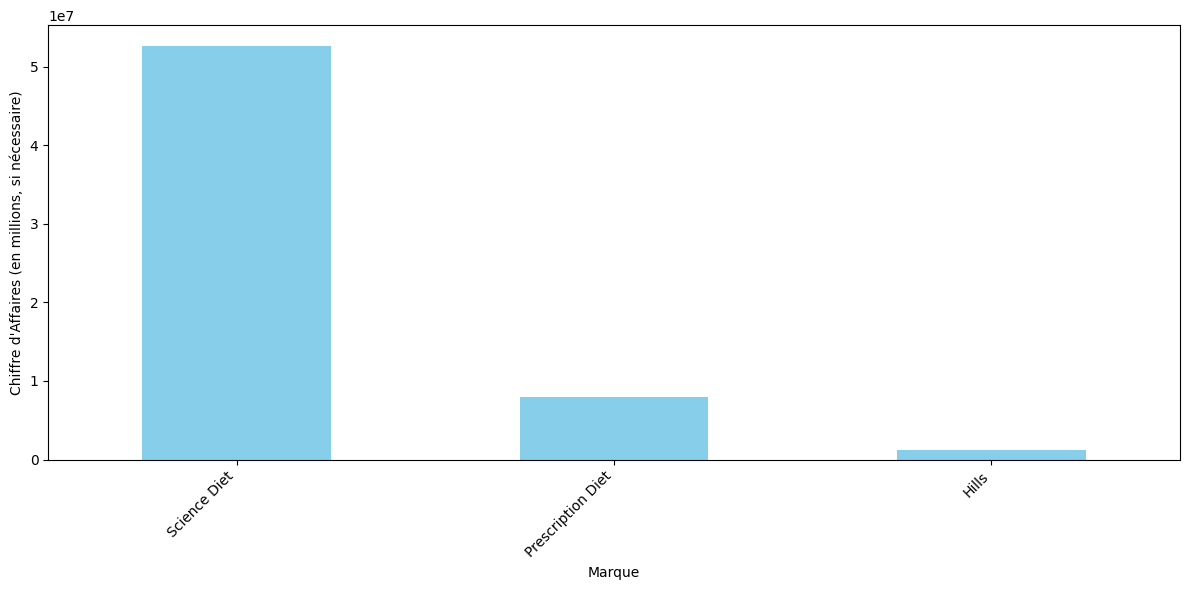

In [6]:
plt.figure(figsize=(12, 6))
CA_marque.plot(kind='bar', color='skyblue')
plt.xlabel('Marque')
plt.ylabel('Chiffre d\'Affaires (en millions, si nécessaire)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
marque_leader = df_ventes.groupby('brand')['sales'].sum().idxmax() 
df_leader = df_ventes[df_ventes['brand'] == marque_leader]

#Calculer le CA par produit pour cette marque
top10_products_leader = df_leader.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 des produits de la marque leader :")
print(top10_products_leader)


Top 10 des produits de la marque leader :
product_name
SD Ca Adt SenSt&Sk Ckn 30lb bg              2126231.17
SD Ca Adt SenSt&Sk Tk&RStew 12x12.5oz cs    1481516.64
SD Ca Adt LB Ckn 35lb Sh                    1059499.15
SD Ca Adt Ckn 35lb Sh                       1035124.30
SD Ca Adt SmPws Ckn 15.5lb bg                935143.43
SD Ca Adt SenSt&Sk Sm&Min Ckn 15lb bg        916534.14
SD Ca Adt PerWgt Vg&CknStew 12x12.5oz cs     865775.78
SD Ca Adt SenSt&Sk Ckn 15.5lb bg             859343.33
SD Ca Adt PerWgt Ckn 25lb bg                 824296.22
SD Ca Adt SenSt&Sk Ckn 12x12.8oz cs          817279.88
Name: sales, dtype: float64


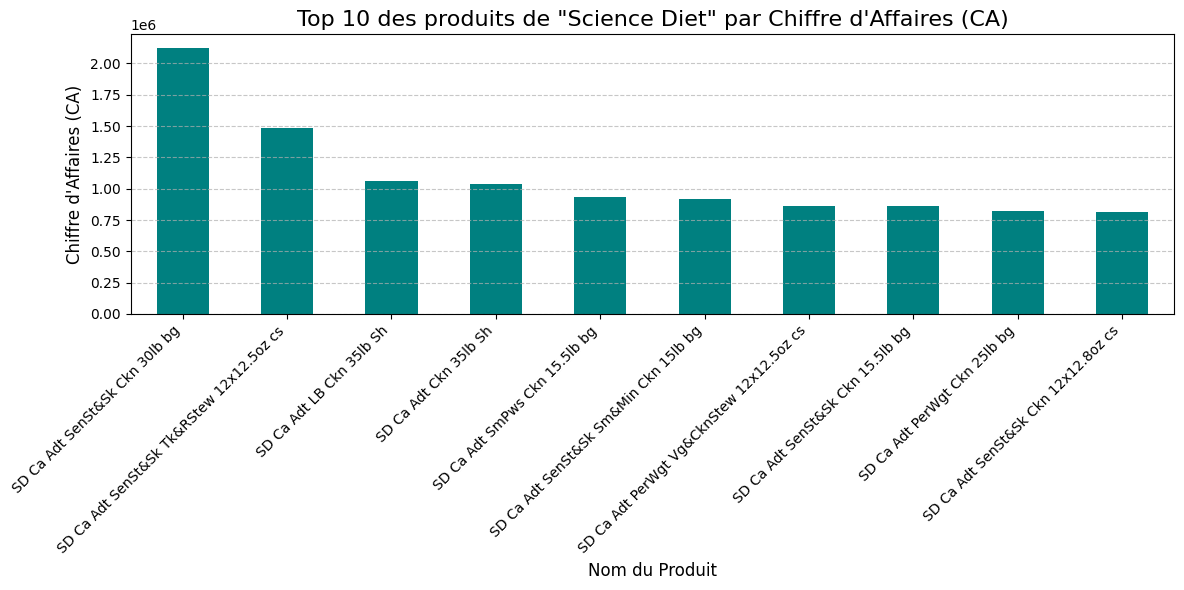

In [8]:
plt.figure(figsize=(12, 6))
top10_products_leader.plot(kind='bar', color='teal')

plt.title(f'Top 10 des produits de "{marque_leader}" par Chiffre d\'Affaires (CA)', fontsize=16)
plt.xlabel('Nom du Produit', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (CA)', fontsize=12)

plt.xticks(rotation=45, ha='right') # Rotation pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

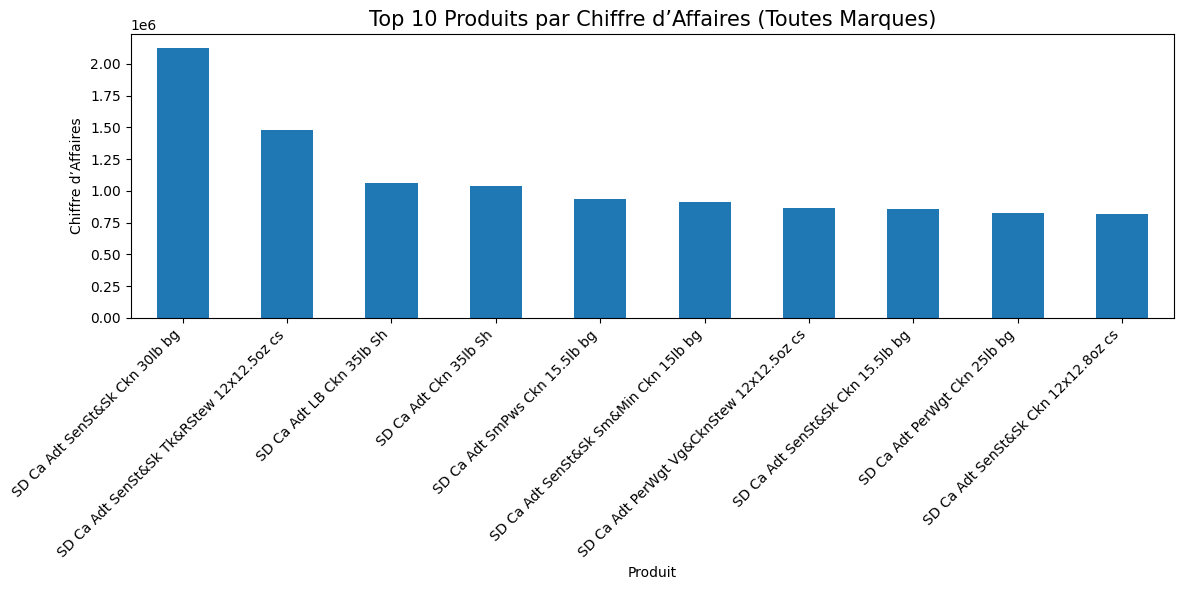

In [9]:
top10_products = (
    df_ventes
    .groupby('product_name')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top10_products.plot(kind='bar')

plt.title('Top 10 Produits par Chiffre d’Affaires (Toutes Marques)', fontsize=15)
plt.xlabel('Produit')
plt.ylabel('Chiffre d’Affaires')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_59804/3578138043.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


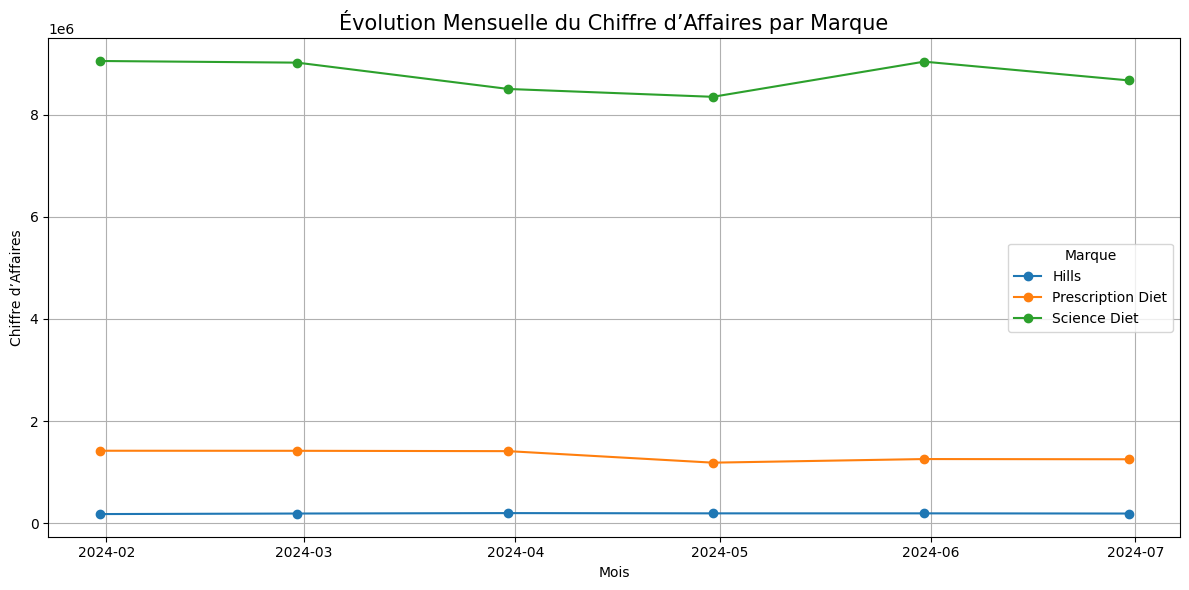

In [10]:
df_ventes['timestamp_utc'] = pd.to_datetime(df_ventes['timestamp_utc'])

# CA mensuel par marque
sales_per_month_brand = (
    df_ventes
    .set_index('timestamp_utc')
    .groupby('brand')['sales']
    .resample('M')
    .sum()
    .reset_index()
)

# Visualisation
plt.figure(figsize=(12, 6))

for brand in sales_per_month_brand['brand'].unique():
    data = sales_per_month_brand[sales_per_month_brand['brand'] == brand]
    plt.plot(data['timestamp_utc'], data['sales'], marker='o', label=brand)

plt.title('Évolution Mensuelle du Chiffre d’Affaires par Marque', fontsize=15)
plt.xlabel('Mois')
plt.ylabel('Chiffre d’Affaires')
plt.legend(title='Marque')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_59804/2131316554.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_per_month = df_ventes.set_index('timestamp_utc')['sales'].resample('M').sum()


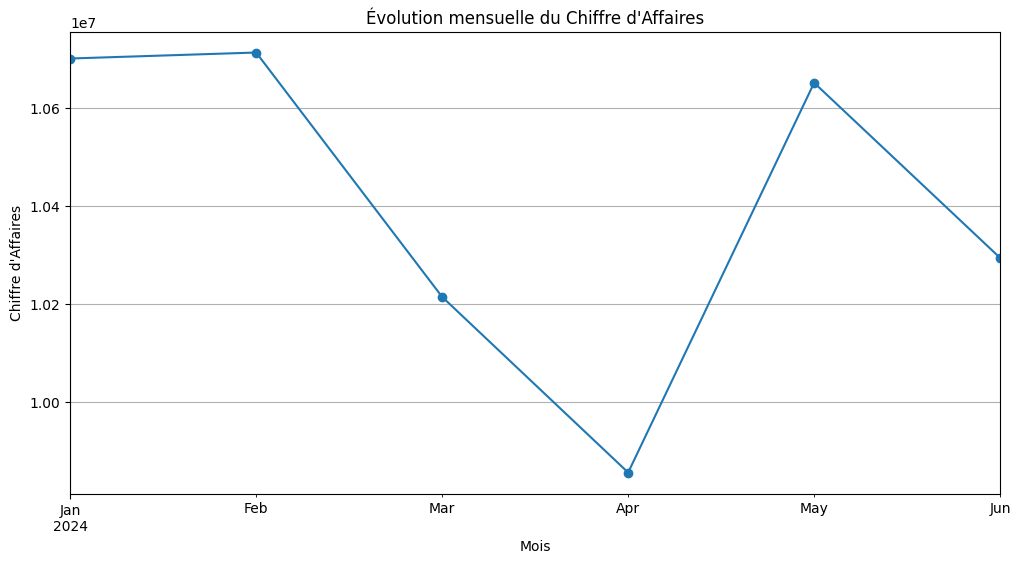

In [11]:
df_ventes['timestamp_utc'] = pd.to_datetime(df_ventes['timestamp_utc'])

# Regrouper les ventes par mois
sales_per_month = df_ventes.set_index('timestamp_utc')['sales'].resample('M').sum()

# Visualisation
plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='line', marker='o')
plt.title('Évolution mensuelle du Chiffre d\'Affaires')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires')
plt.grid(True)
plt.show()

/var/folders/z4/l1g2ltz55419x6y847ly0r800000gn/T/ipykernel_59804/2573015805.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


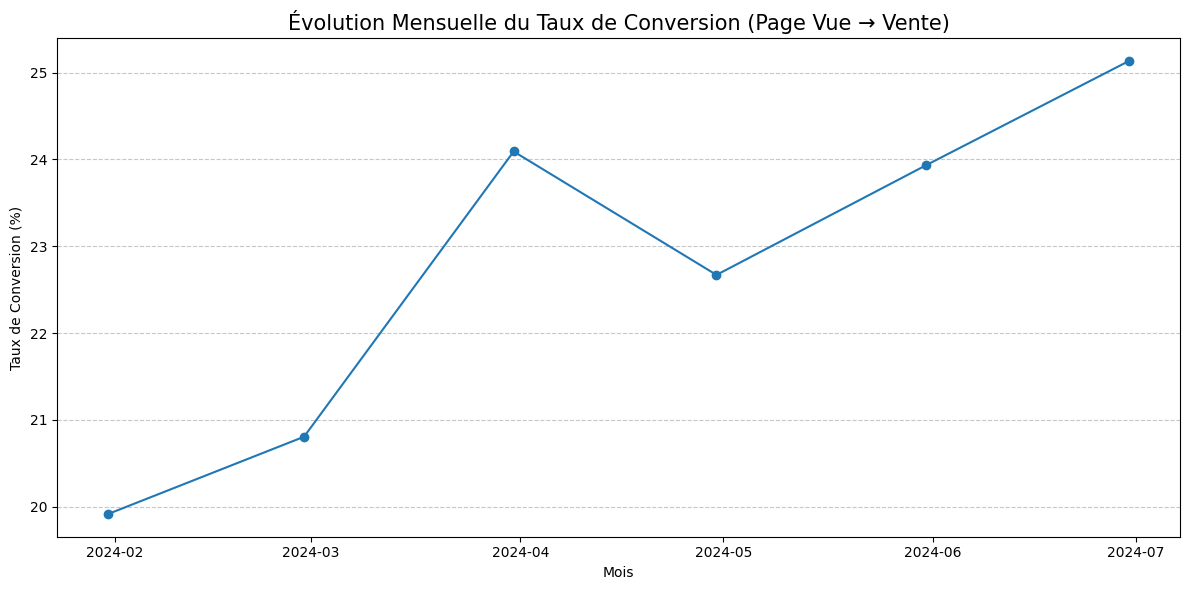

In [12]:
df_ret['timestamp_utc'] = pd.to_datetime(df_ret['timestamp_utc'])

df_ret['is_view'] = (df_ret['event_name'] == 'Product Page View').astype(int)
df_ret['is_order'] = (df_ret['event_name'] == 'Order').astype(int)

# Agrégation mensuelle
monthly_cvr = (
    df_ret
    .set_index('timestamp_utc')
    .resample('M')
    .agg(
        total_views=('is_view', 'sum'),
        total_orders=('is_order', 'sum')
    )
)

# Calcul du taux de conversion
monthly_cvr = monthly_cvr[monthly_cvr['total_views'] > 0]
monthly_cvr['conversion_rate'] = (
    monthly_cvr['total_orders'] / monthly_cvr['total_views'] * 100
)

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(monthly_cvr.index, monthly_cvr['conversion_rate'], marker='o')
plt.title('Évolution Mensuelle du Taux de Conversion (Page Vue → Vente)', fontsize=15)
plt.xlabel('Mois')
plt.ylabel('Taux de Conversion (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Purchase frequency distribution

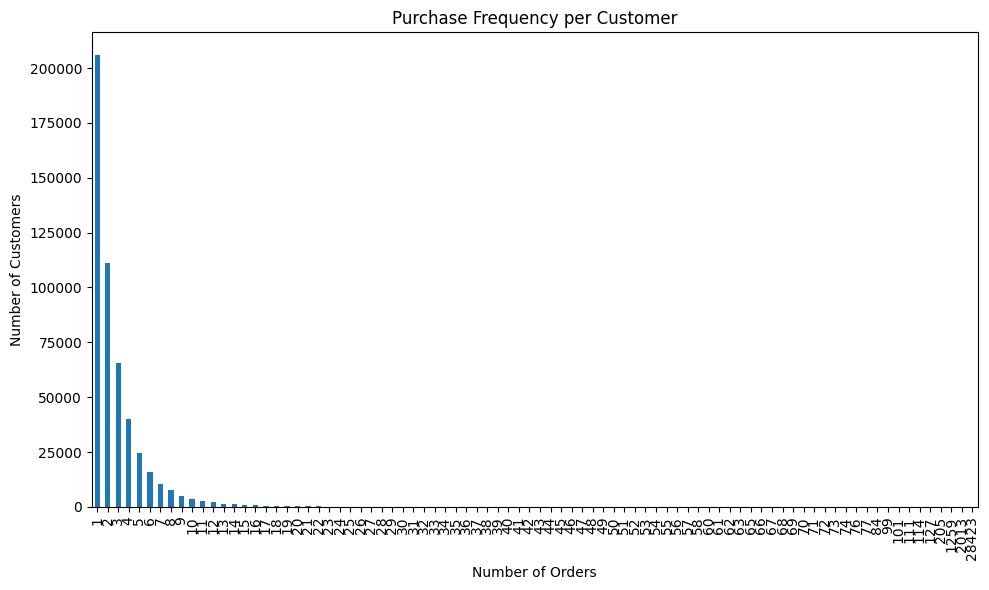

In [13]:
purchase_freq = df_ventes.groupby('customer_id').size()

plt.figure(figsize=(10,6))
purchase_freq.value_counts().sort_index().plot(kind='bar')
plt.title('Purchase Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

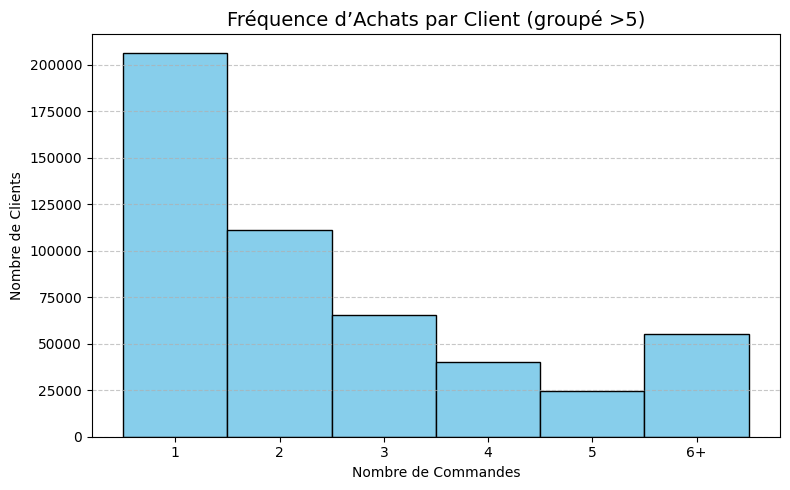

In [14]:
# Nombre de commandes par client
purchase_freq = df_ventes.groupby('customer_id').size()

# Grouper les clients avec >5 commandes
purchase_freq_clipped = purchase_freq.copy()
purchase_freq_clipped[purchase_freq_clipped > 5] = 6

# Histogramme
plt.figure(figsize=(8,5))
plt.hist(purchase_freq_clipped, bins=range(1, 8), color='skyblue', edgecolor='black', align='left')
plt.title('Fréquence d’Achats par Client (groupé >5)', fontsize=14)
plt.xlabel('Nombre de Commandes')
plt.ylabel('Nombre de Clients')
plt.xticks(range(1,7), ['1','2','3','4','5','6+'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### CA généré par nouveaux vs clients fidèles

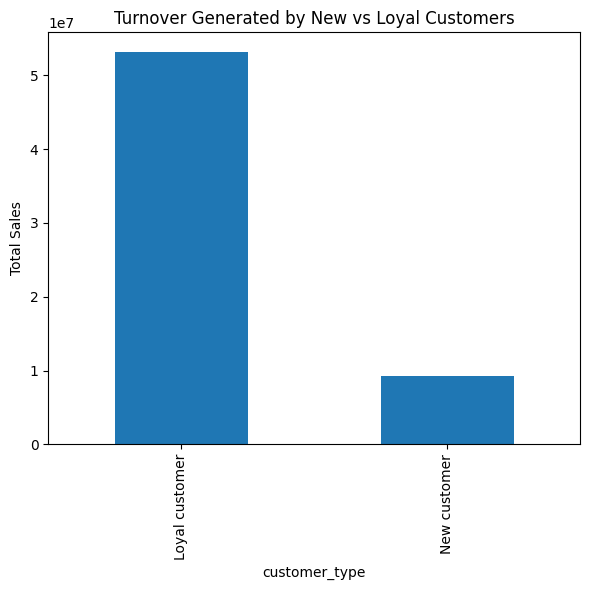

In [15]:
orders_per_customer = df_ventes.groupby('customer_id').size()

customer_type = orders_per_customer.apply(
    lambda x: 'New customer' if x == 1 else 'Loyal customer'
)

df_orders = df_ventes.merge(
    customer_type.rename('customer_type'),
    on='customer_id'
)

turnover_by_type = df_orders.groupby('customer_type')['sales'].sum()

plt.figure(figsize=(6,6))
turnover_by_type.plot(kind='bar')
plt.title('Turnover Generated by New vs Loyal Customers')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

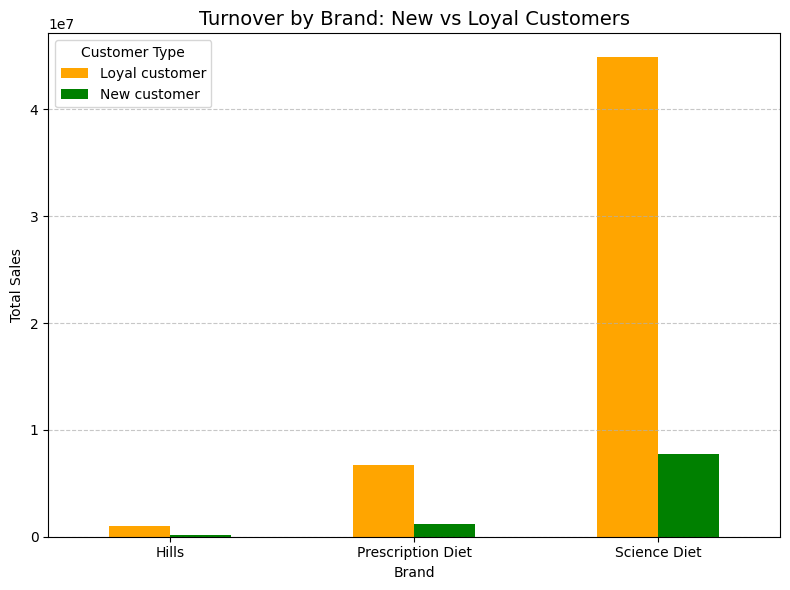

In [16]:
orders_per_customer = df_ventes.groupby('customer_id').size()

customer_type = orders_per_customer.apply(
    lambda x: 'New customer' if x == 1 else 'Loyal customer'
)

df_orders = df_ventes.merge(
    customer_type.rename('customer_type'),
    on='customer_id'
)

turnover_by_brand_type = df_orders.groupby(['brand','customer_type'])['sales'].sum().unstack()

turnover_by_brand_type.plot(kind='bar', figsize=(8,6), color=['orange','green'])
plt.title('Turnover by Brand: New vs Loyal Customers', fontsize=14)
plt.ylabel('Total Sales')
plt.xlabel('Brand')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


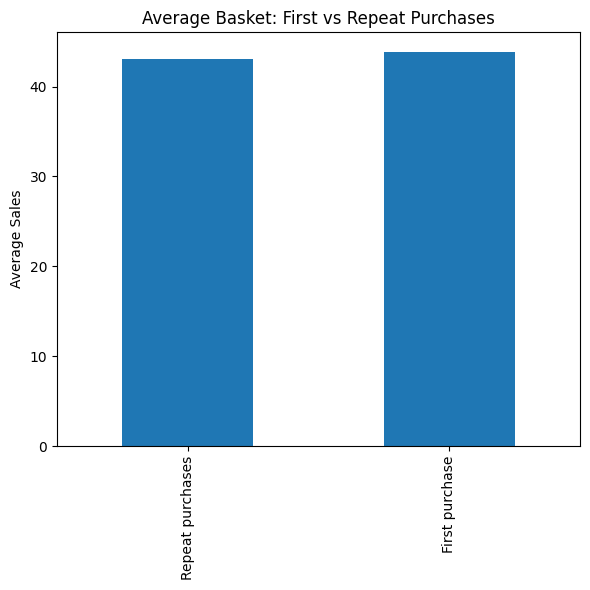

In [17]:
df_orders['order_rank'] = (
    df_orders.groupby('customer_id')['timestamp_utc']
    .rank(method='first')
)

basket_evolution = df_orders.groupby(
    df_orders['order_rank'] == 1
)['sales'].mean()

basket_evolution.index = ['Repeat purchases', 'First purchase']

plt.figure(figsize=(6,6))
basket_evolution.plot(kind='bar')
plt.title('Average Basket: First vs Repeat Purchases')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

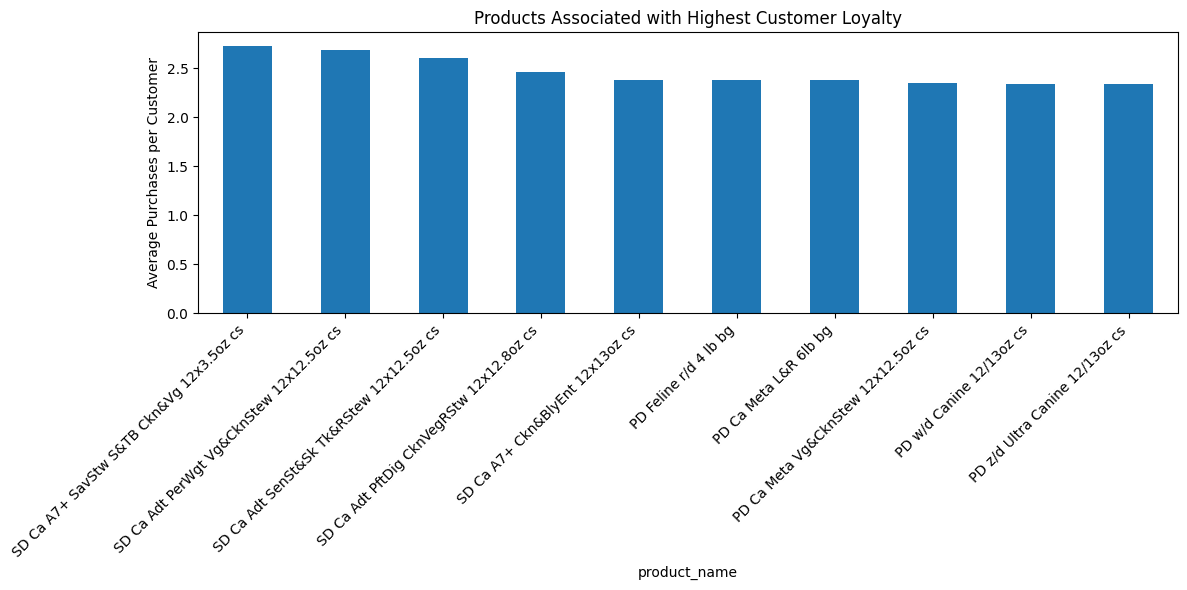

In [18]:
product_loyalty = (
    df_orders.groupby(['product_name', 'customer_id'])
    .size()
    .groupby('product_name')
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
product_loyalty.plot(kind='bar')
plt.title('Products Associated with Highest Customer Loyalty')
plt.ylabel('Average Purchases per Customer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Données socio démographiques

In [19]:
df_socio = pd.read_csv("data/socio_demo.csv")

In [22]:
df_socio.head()

,customer_id,breed,age,income
0,rezLh5Hae3m6flaxM4,Purebred,[25-35[,[120-200K$[
1,resWkHpEcL1IUfdoBp,Purebred,[25-35[,[80-120K$[
2,re9qxF7kS9R2LwOVVY,Purebred,[35-45[,[80-120K$[
3,re3IZNYZY6xr8OAE56,Purebred,[55-65[,[40-80K$[
4,re01lnV2DfgMLdfIF7,Purebred,[65+[,[80-120K$[


In [23]:
df_socio.shape

(1354584, 4)

In [20]:
df = pd.merge(left=df_ret, right=df_socio, on='customer_id', how='left')

In [25]:
nan_df = df.isnull().sum() * 100 / len(df)
print(nan_df)

customer_id       0.000000
timestamp_utc     0.000000
event_name        0.000000
brand             2.810041
product_name      2.810041
sales            85.411475
quantity         85.411475
is_view           0.000000
is_order          0.000000
breed             0.000000
age               0.000000
income            0.000000
dtype: float64


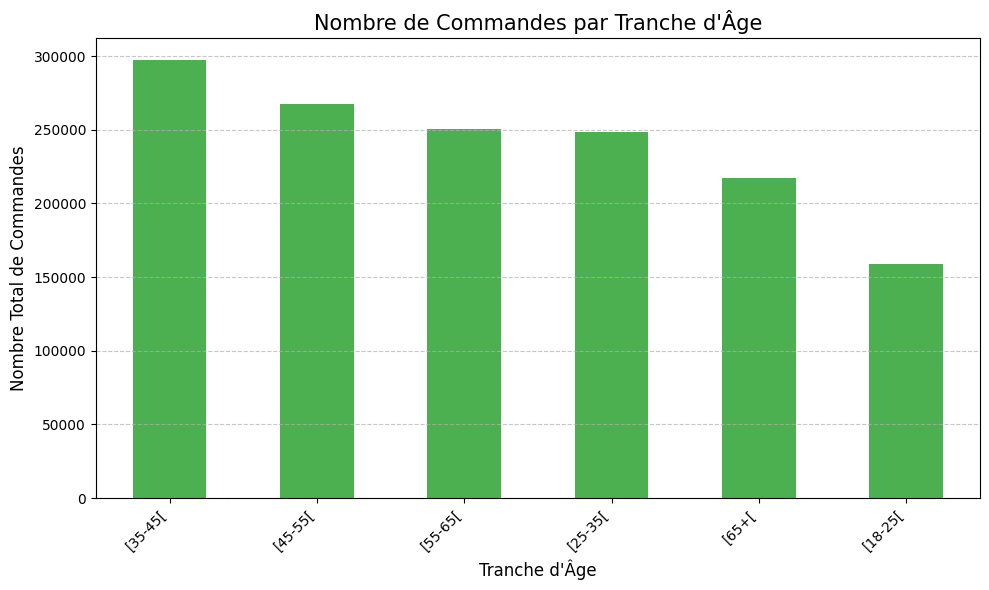

In [21]:
df_orders = df[df['event_name'] == 'Order'].copy()

orders_by_age = df_orders.groupby('age').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
orders_by_age.plot(kind='bar', color='#4CAF50')

plt.title('Nombre de Commandes par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

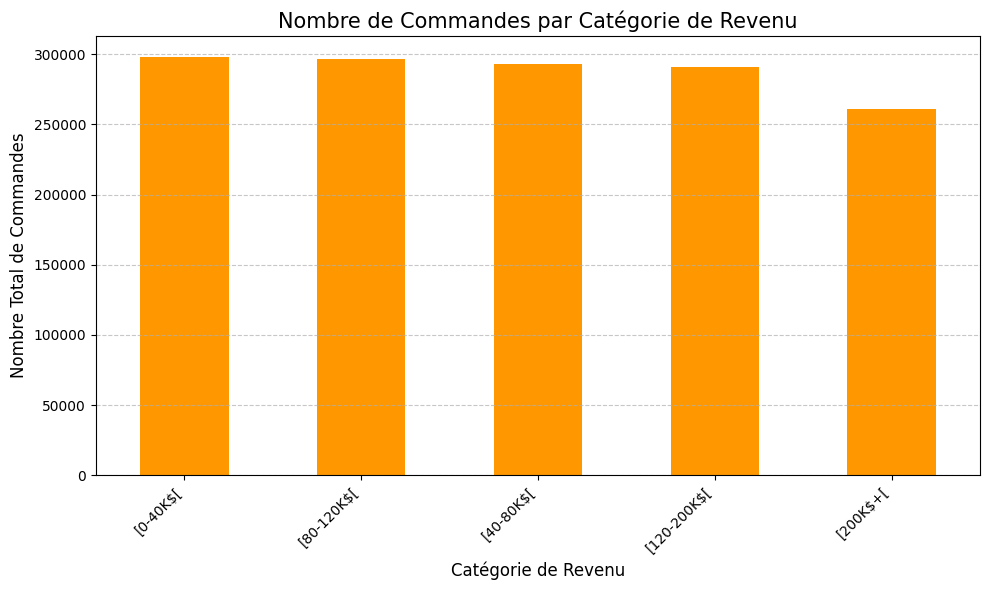

In [22]:
orders_by_income = df_orders.groupby('income').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
orders_by_income.plot(kind='bar', color='#FF9800')

plt.title('Nombre de Commandes par Catégorie de Revenu', fontsize=15)
plt.xlabel('Catégorie de Revenu', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

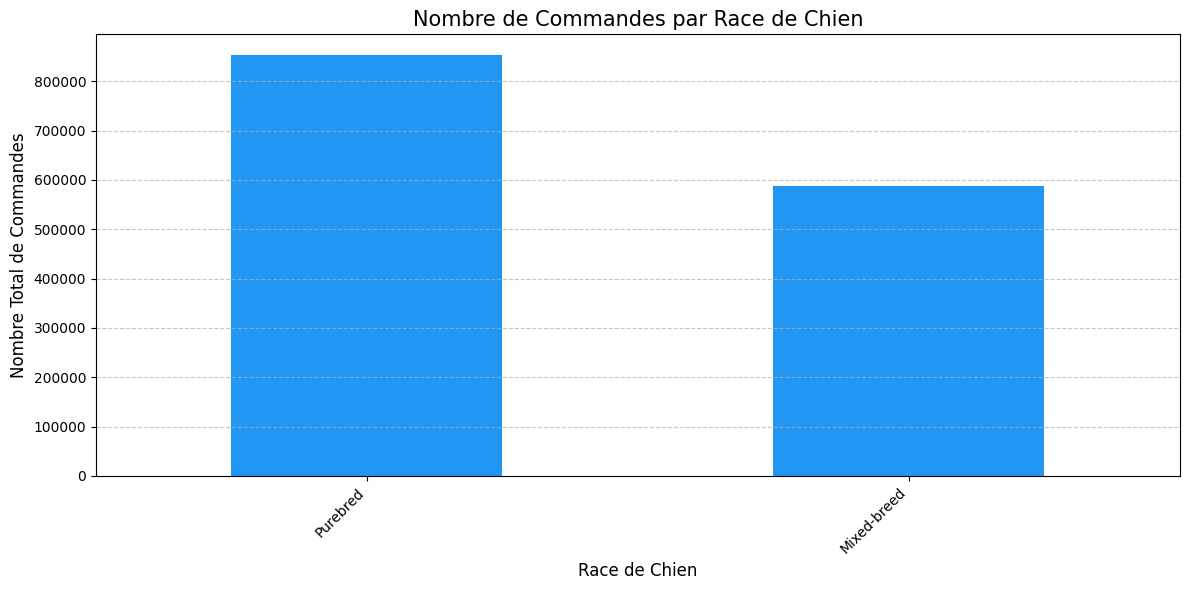

In [23]:
orders_by_breed = df_orders.groupby('breed').size().sort_values(ascending=False).head(10) # Top 10 pour la lisibilité

plt.figure(figsize=(12, 6))
orders_by_breed.plot(kind='bar', color='#2196F3')

plt.title('Nombre de Commandes par Race de Chien', fontsize=15)
plt.xlabel('Race de Chien', fontsize=12)
plt.ylabel('Nombre Total de Commandes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

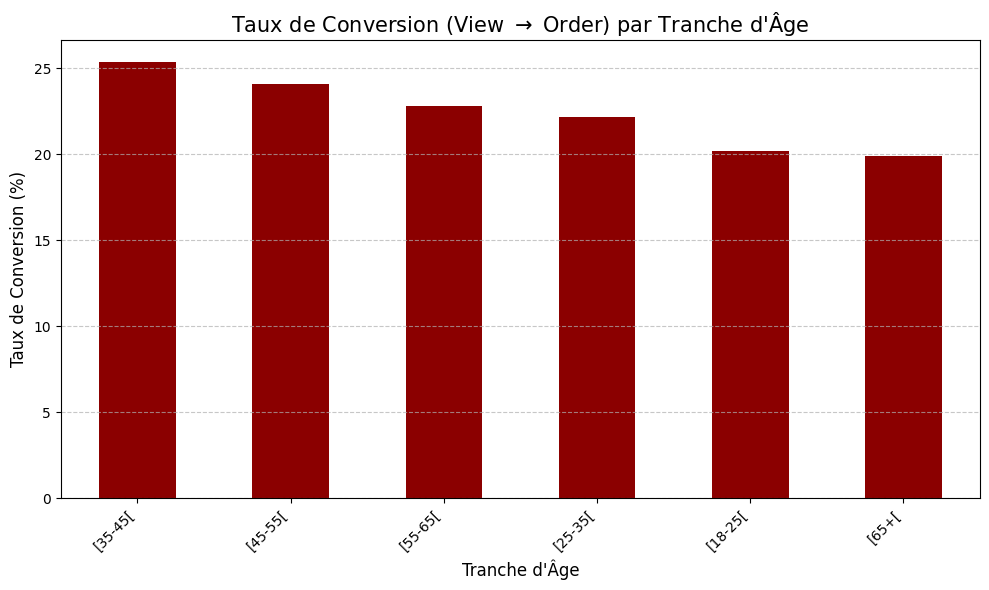

In [24]:
def calculate_conversion_rate(df, segment_column):
    """Calcule le taux de conversion (Order / View) pour chaque segment."""
    
    df_events = df[df['event_name'].isin(['Product Page View', 'Order'])].copy()
    
    df_events['is_view'] = (df_events['event_name'] == 'Product Page View').astype(int)
    df_events['is_order'] = (df_events['event_name'] == 'Order').astype(int)
    
    segment_data = df_events.groupby(segment_column).agg(
        total_views=('is_view', 'sum'),
        total_orders=('is_order', 'sum')
    )
    
    # Calculer le taux de conversion (%)
    segment_data['conversion_rate'] = (segment_data['total_orders'] / segment_data['total_views']) * 100
    
    # Nettoyage (éviter les divisions par zéro)
    segment_data = segment_data[segment_data['total_views'] > 0].sort_values(
        'conversion_rate', ascending=False
    )
    return segment_data['conversion_rate']

# Taux de Conversion par Âge
cvr_by_age = calculate_conversion_rate(df, 'age')

# Taux de Conversion par Revenu
cvr_by_income = calculate_conversion_rate(df, 'income')

# Taux de Conversion par Type de Race
cvr_by_breed = calculate_conversion_rate(df, 'breed')

plt.figure(figsize=(10, 6))
cvr_by_age.plot(kind='bar', color='darkred')
plt.title('Taux de Conversion (View $\\to$ Order) par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Taux de Conversion (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

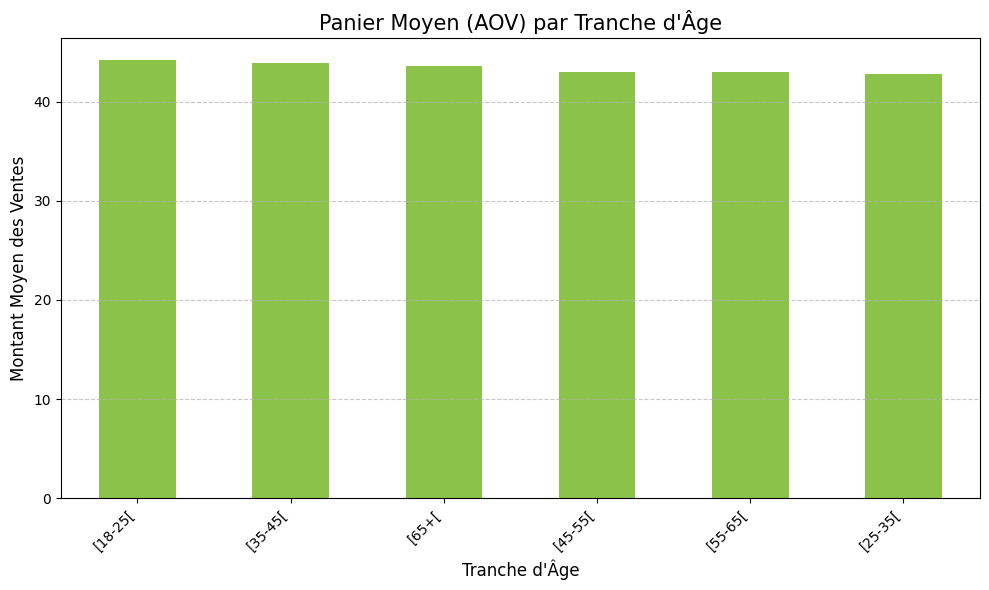

In [25]:
# Calculer le Panier Moyen par catégorie d'âge
aov_by_age = df_orders.groupby('age')['sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
aov_by_age.plot(kind='bar', color='#8BC34A')
plt.title('Panier Moyen (AOV) par Tranche d\'Âge', fontsize=15)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Montant Moyen des Ventes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### What are the potential new customers

In [26]:
# Clients existants
existing_customers = df_ventes['customer_id'].unique()

# Clients qui ont vu mais jamais acheté
viewers = df_ret[df_ret['event_name'] == 'Product Page View']['customer_id'].unique()
potential_customers = set(viewers) - set(existing_customers)

df_potential = df_socio[df_socio['customer_id'].isin(potential_customers)]

# Profil socio-démographique
df_potential[['age','income','breed']].describe(include='all')

,age,income,breed
count,842100,842100,842100
unique,6,5,2
top,[65+[,[200K$+[,Purebred
freq,176823,185326,521750


In [ ]:
#Clients potentiels : 65+, high income, purebred

In [ ]:
df_potential['age'].value_counts().plot(kind='bar')

plt.title('Age Distribution of Potential Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_potential['income'].value_counts().plot(kind='bar', color='orange')

plt.title('Income Distribution of Potential Customers')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_potential['breed'].value_counts().plot(kind='bar', color='green')

plt.title('Dog Breed Type of Potential Customers')
plt.xlabel('Breed Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Profile of the best customers

In [27]:
# CA total et fréquence
customer_stats = df_ventes.groupby('customer_id').agg(
    total_sales=('sales','sum'),
    frequency=('sales','count'),
    avg_basket=('sales','mean')
)

# Top 10% meilleurs clients
threshold = customer_stats['total_sales'].quantile(0.9)
best_customers = customer_stats[customer_stats['total_sales'] >= threshold]

# Profil socio-démographique
df_socio_best = df_socio[df_socio['customer_id'].isin(best_customers.index)]
df_socio_best.describe(include='all')

,customer_id,breed,age,income
count,50203,50203,50203,50203
unique,50203,2,6,5
top,reC34LCct0JUhRToS0,Purebred,[35-45[,[0-40K$[
freq,1,32027,10126,11413


In [31]:
# CA total par client
customer_value = df_ventes.groupby('customer_id')['sales'].sum()

# Seuil top 10 %
threshold = customer_value.quantile(0.9)

best_customers = customer_value[customer_value >= threshold].index

In [32]:
df_best = df_socio[df_socio['customer_id'].isin(best_customers)]

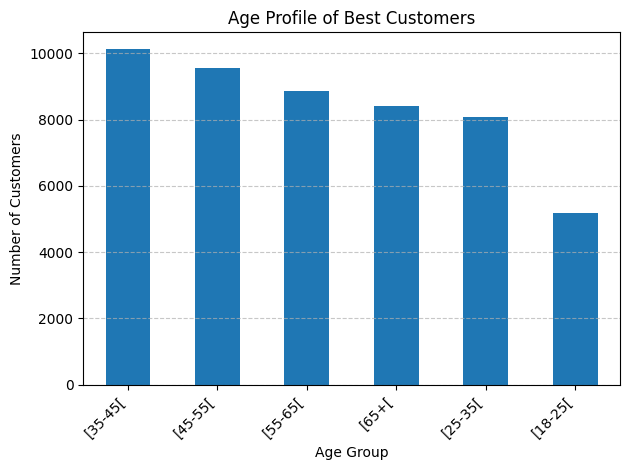

In [33]:
df_best['age'].value_counts().plot(kind='bar')
plt.title('Age Profile of Best Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


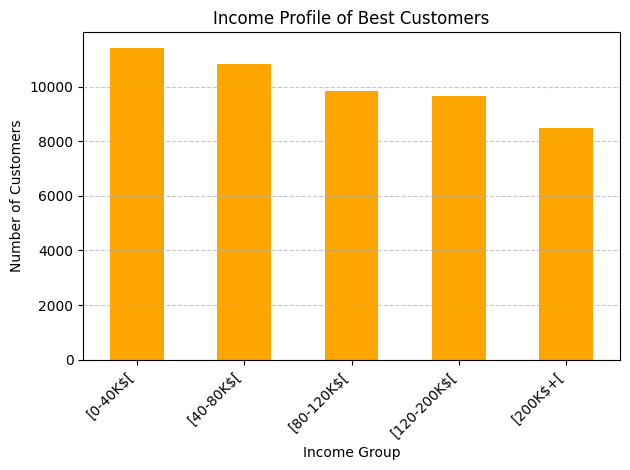

In [34]:
df_best['income'].value_counts().plot(kind='bar', color='orange')
plt.title('Income Profile of Best Customers')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### RFM

In [35]:
# On travaille uniquement sur les ventes
df_ventes['timestamp_utc'] = pd.to_datetime(df_ventes['timestamp_utc'])

# Date de référence = dernière date observée
reference_date = df_ventes['timestamp_utc'].max()

In [36]:
rfm = df_ventes.groupby('customer_id').agg(
    recency=('timestamp_utc', lambda x: (reference_date - x.max()).days),
    frequency=('timestamp_utc', 'count'),
    monetary=('sales', 'sum')
)

In [37]:
rfm['segment'] = 'Occasional'

rfm.loc[
    (rfm['frequency'] >= 3) & (rfm['monetary'] >= rfm['monetary'].median()),
    'segment'
] = 'Best customers'

rfm.loc[
    (rfm['frequency'] == 1),
    'segment'
] = 'One-time buyers'


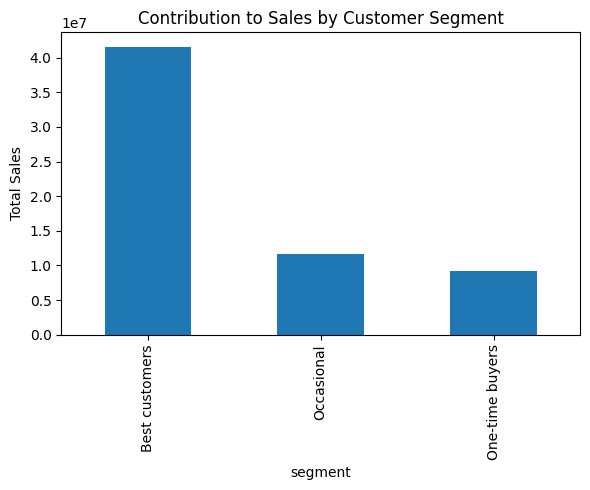

In [38]:
segment_sales = rfm.merge(
    df_ventes[['customer_id','sales']],
    on='customer_id'
).groupby('segment')['sales'].sum()

plt.figure(figsize=(6,5))
segment_sales.plot(kind='bar')
plt.title('Contribution to Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


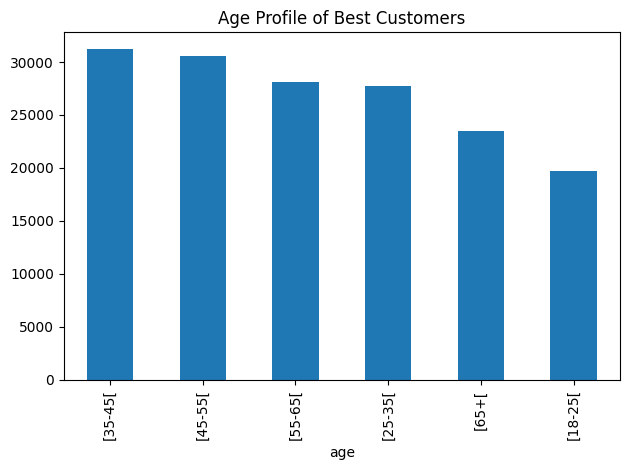

In [40]:
best_customers = rfm[rfm['segment'] == 'Best customers'].index

df_best = df_socio[df_socio['customer_id'].isin(best_customers)]

df_best['age'].value_counts().plot(kind='bar')
plt.title('Age Profile of Best Customers')
plt.tight_layout()
plt.show()


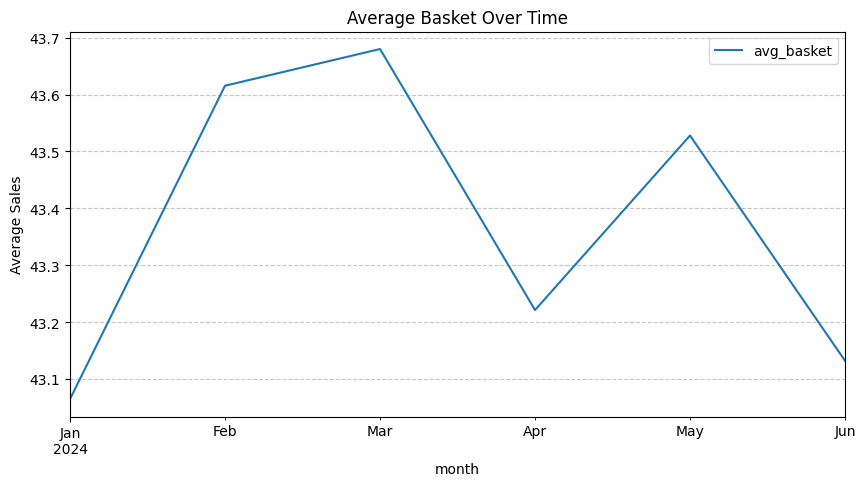

In [41]:
df_ventes['month'] = df_ventes['timestamp_utc'].dt.to_period('M')

monthly_kpi = df_ventes.groupby('month').agg(
    avg_basket=('sales','mean'),
    orders=('customer_id','count')
)

monthly_kpi.plot(y='avg_basket', figsize=(10,5))
plt.title('Average Basket Over Time')
plt.ylabel('Average Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


##### Données publisher

In [39]:
df_program = pd.read_csv("data/programmatic_publisher.csv")

In [40]:
df_program.head()

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930
3,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-26 19:15:54,Contextual,TV,1191.750
4,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-05-31 18:38:54,Retargeting,TV,739.262


In [ ]:
df = pd.merge(left=df_pub, right=df_socio, on='customer_id', how='left')